In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from IPython.display import display, Image
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('csv/test.csv')
info = pd.read_csv('csv/info.csv')
df_network = pd.read_csv('csv/network.csv')
news = pd.read_csv('csv/covid-19_news.csv')
sample_submit = pd.read_csv('csv/sample_submit.csv')
df_train = pd.read_csv('csv/train.csv')

In [3]:
df_test.target[df_test.target ==0].count()

1135954

In [4]:
df_test.date.unique()

array([20191201, 20191202, 20191203, 20191207, 20191209, 20191210,
       20191211, 20191213, 20191215, 20191216, 20191217, 20191218,
       20191219, 20191220, 20191221, 20191223, 20191224, 20191225,
       20191226, 20191227, 20200102, 20200103, 20200107, 20200108,
       20200109, 20200110, 20200114, 20200115, 20200117, 20200120,
       20200121, 20200124, 20200127, 20200128, 20200130, 20200131,
       20200203, 20200204, 20200205, 20200206, 20200207, 20200213,
       20200214, 20200218, 20200220, 20200221, 20200225, 20200302,
       20200303, 20200309, 20200317, 20200321, 20200324, 20200325,
       20200408, 20200525, 20200528, 20200623, 20200625, 20200629,
       20200706, 20200708, 20200712, 20200713, 20200714, 20200715,
       20200718, 20200728, 20200731, 20200803, 20200806, 20200817,
       20200820, 20200826, 20200901, 20200902, 20200904, 20200911,
       20200917, 20200923, 20200924, 20200929, 20201008, 20201009,
       20201013, 20201014, 20201019, 20201021], dtype=int64)

In [5]:
df_train.date.unique()

array([20191204, 20191205, 20191206, 20191211, 20191212, 20191213,
       20191214, 20191216, 20191217, 20191220, 20191222, 20191225,
       20191231, 20200106, 20200107, 20200108, 20200109, 20200110,
       20200111, 20200112, 20200114, 20200115, 20200116, 20200118,
       20200119, 20200120, 20200121, 20200122, 20200123, 20200125,
       20200127, 20200128, 20200129, 20200130, 20200131, 20200203,
       20200204, 20200205, 20200206, 20200210, 20200212, 20200213,
       20200214, 20200217, 20200219, 20200221, 20200224, 20200226,
       20200227, 20200304, 20200305, 20200306, 20200310, 20200314,
       20200316, 20200318, 20200326, 20200414, 20200426, 20200508,
       20200528, 20200622, 20200624, 20200629, 20200630, 20200707,
       20200709, 20200711, 20200801, 20200818, 20200826, 20200831,
       20200903, 20200907, 20200914, 20200916, 20200918, 20200928,
       20201002, 20201005, 20201013, 20201016, 20201022], dtype=int64)

In [6]:
df_train

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime
0,0,20191204,A,1,AFGKvJ,Rlfq,06:11,0.0
1,1,20191204,A,1,AFGKvJ,coZB,06:13,0.0
2,2,20191204,A,1,AFGKvJ,LMww,06:16,0.0
3,3,20191204,A,1,AFGKvJ,VNyR,06:18,0.0
4,4,20191204,A,1,AFGKvJ,jhlV,06:20,0.0
...,...,...,...,...,...,...,...,...
1488880,1488880,20201022,D,2,zbKwea,BCRD,18:47,0.0
1488881,1488881,20201022,D,2,zbKwea,AVjc,18:51,1.0
1488882,1488882,20201022,D,2,zbKwea,uYlv,18:53,0.0
1488883,1488883,20201022,D,2,zbKwea,wwYD,18:59,0.0


In [7]:
df_network

,network_id,station1,station2
0,1,vpGT,Femc
1,2,Femc,dJlm
2,3,dJlm,jebQ
3,4,jebQ,PsTo
4,5,PsTo,mxQg
...,...,...,...
109,110,BCRD,AVjc
110,111,AVjc,uYlv
111,112,uYlv,wwYD
112,113,wwYD,mkGW


In [8]:
G = nx.DiGraph()
for st1, st2 in zip(df_network['station1'], df_network['station2']):
    G.add_edges_from([(st1, st2)])
    G.add_edges_from([(st2, st1)])
pos = nx.kamada_kawai_layout(G)  # 各駅の描画位置の初期値
pos = {k: [(v[0] if v[1]>0 else -v[0]), -v[1]] for k, v in pos.items()}  # 再計算結果がそれっぽくなるように手動で補正
pos = nx.kamada_kawai_layout(G, pos=pos)  # 描画位置の再計算

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33865 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-package

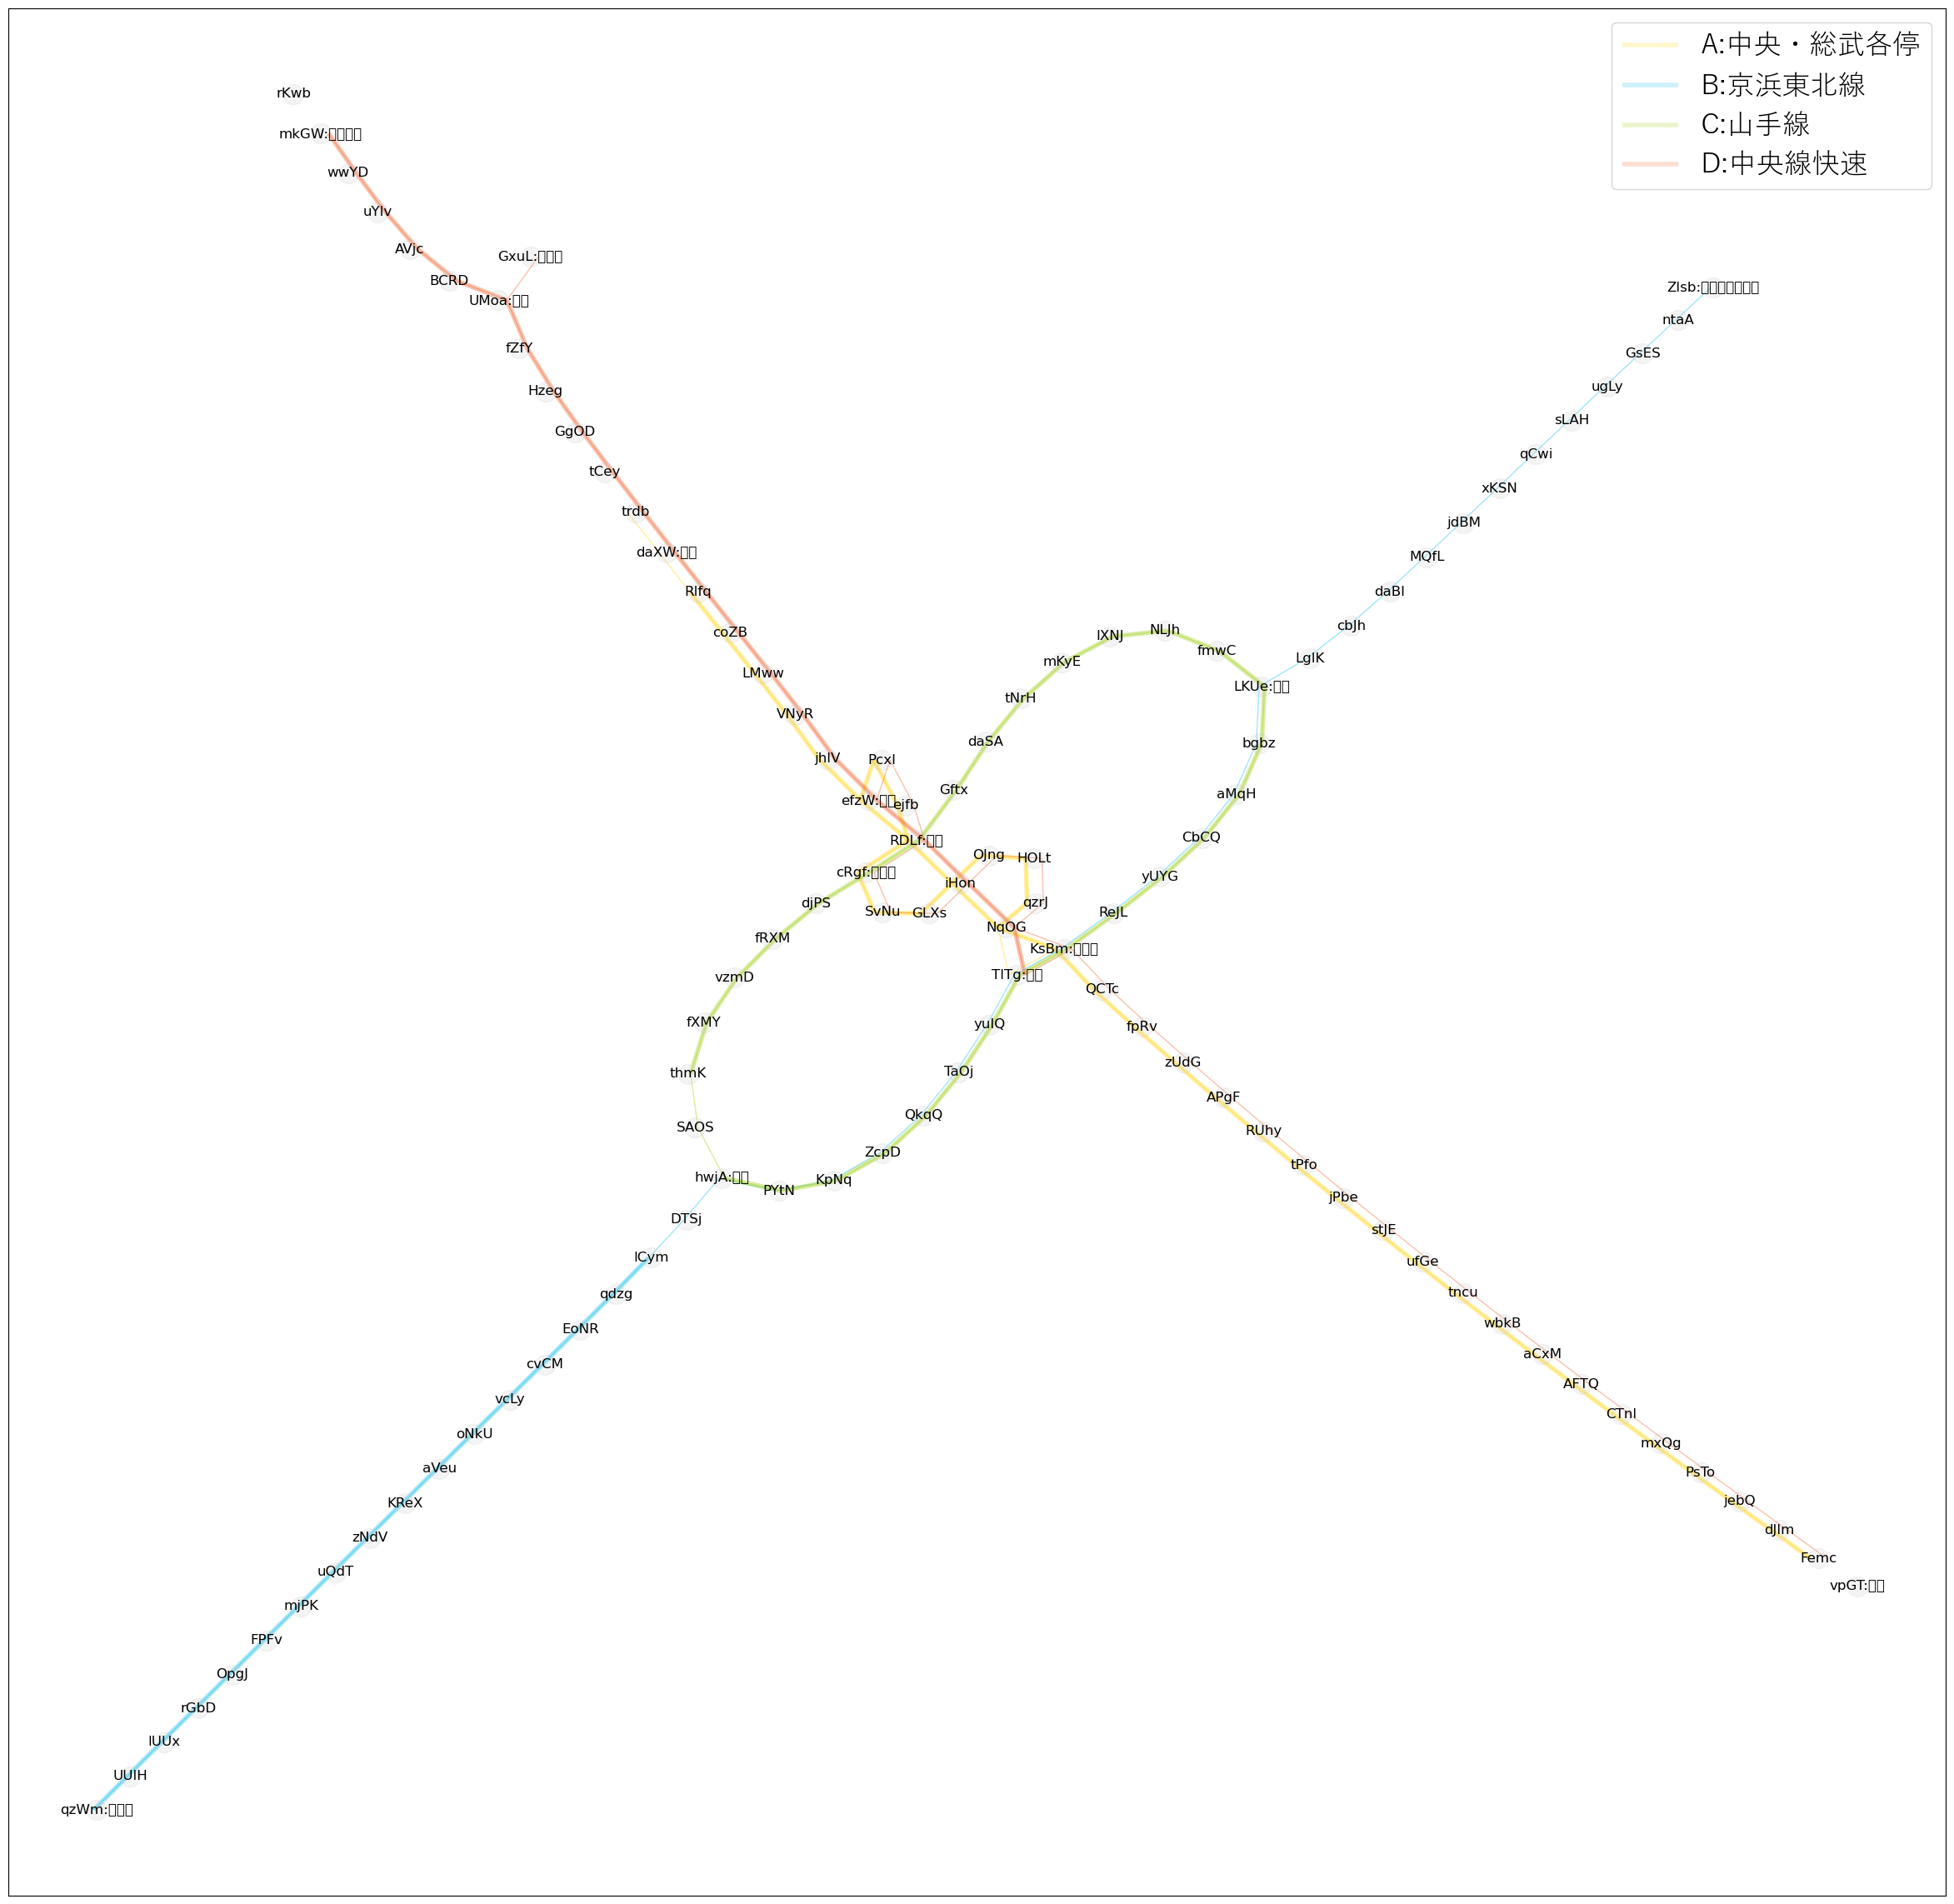

In [9]:
line_names_jp = ["中央・総武各停", "京浜東北線", "山手線", "中央線快速"]
colors = ["#ffd400", "#00bae8", "#99cc00", "#f15a22"]
station_dec = {
    "efzW": "中野",
    "KsBm": "秋葉原",
    "LKUe": "田端",
    "RDLf": "新宿",
    "cRgf": "代々木",
    "hwjA": "品川",
    "Zlsb": "さいたま新都心",
    "daXW": "三鷹",
    "vpGT": "千葉",
    "TlTg": "神田",
    "qzWm": "本郷台",
    "mkGW": "西八王子",
    "UMoa": "国立",
    "GxuL": "新小平",
}

fig = plt.figure(figsize=(30,30), dpi=100)
nx.draw_networkx_nodes(G, pos, node_color="#cccccc", alpha=0.2, node_size=300)  # ノードの描画
G_relabeled = nx.relabel_nodes(G, lambda x: f"{x}:{station_dec[x]}" if x in station_dec else x)
for k, v in station_dec.items():
    pos[f"{k}:{v}"] = pos[k]
nx.draw_networkx_labels(G_relabeled, pos,)  # 駅名の描画

for i, (line_name, line_name_jp, color) in enumerate(zip("ABCD", line_names_jp, colors)):
    p = {k: [v[0]+(i-1.5)*0.006, v[1]] for k, v in pos.items()}  # 複数の路線が重なって描画されないように適当にずらす
    
    g_all = G.subgraph(df_train[(df_train["lineName"]==line_name)]["stopStation"].unique())  # train 内で停車した駅での誘導部分グラフ
    nx.draw_networkx_edges(g_all, p, alpha=0.2, edge_color=color, width=1, arrows=False)  # 細線で描画
    
    g = G.subgraph(df_test[(df_test["lineName"]==line_name) & (df_test["target"]==1)]["stopStation"].unique())  # 予測対象の駅での誘導部分グラフ
    nx.draw_networkx_edges(g, p, alpha=0.2, edge_color=color, width=4, arrows=False, label=f"{line_name}:{line_name_jp}")  # 太線で描画
    
plt.legend(prop={"family": "Yu Gothic", "size": 24})
plt.show()
fig.savefig('./fig/route.png')